In [1]:
%load_ext autoreload
%autoreload 2
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pympc.geometry.polytope import Polytope
from pympc.dynamical_systems import DTAffineSystem, DTPWASystem

In [3]:
m = 1.
g = 10.
k = 10000.
c = 10.
h = .1
q_max = 1000.
v_max = 1000.

In [4]:
# dynamics n.0
A_0 = np.array([
    [0.,0.,1.,0.],
    [0.,0.,0.,1.],
    [0.,0.,0.,0.],
    [0.,0.,0.,0.]
    ])
B_0 = np.zeros((4,1))
c_0 = np.array([[0.],[0.],[0.],[-g]])

# dynamics n.1
A_1 = np.array([
    [0.,0.,1.,0.],
    [0.,0.,0.,1.],
    [0.,0.,-c/m,0.],
    [0.,-k/m,0.,0.]
    ])
B_1 = B_0
c_1 = c_0

In [5]:
x_max_0 = np.array([[q_max],[q_max],[v_max],[v_max]])
x_min_0 = np.array([[-q_max],[0.],[-v_max],[-v_max]])
X_0 = Polytope.from_bounds(x_min_0, x_max_0)
X_0.assemble()

x_max_1 = np.array([[q_max],[0.],[v_max],[v_max]])
x_min_1 = - x_max_0
X_1 = Polytope.from_bounds(x_min_1, x_max_1)
X_1.assemble()

X = [X_0, X_1]

U = Polytope.from_bounds(-np.ones((1,1)), np.ones((1,1)))
U.assemble()
U = [U]*2

<IPython.core.display.Javascript object>


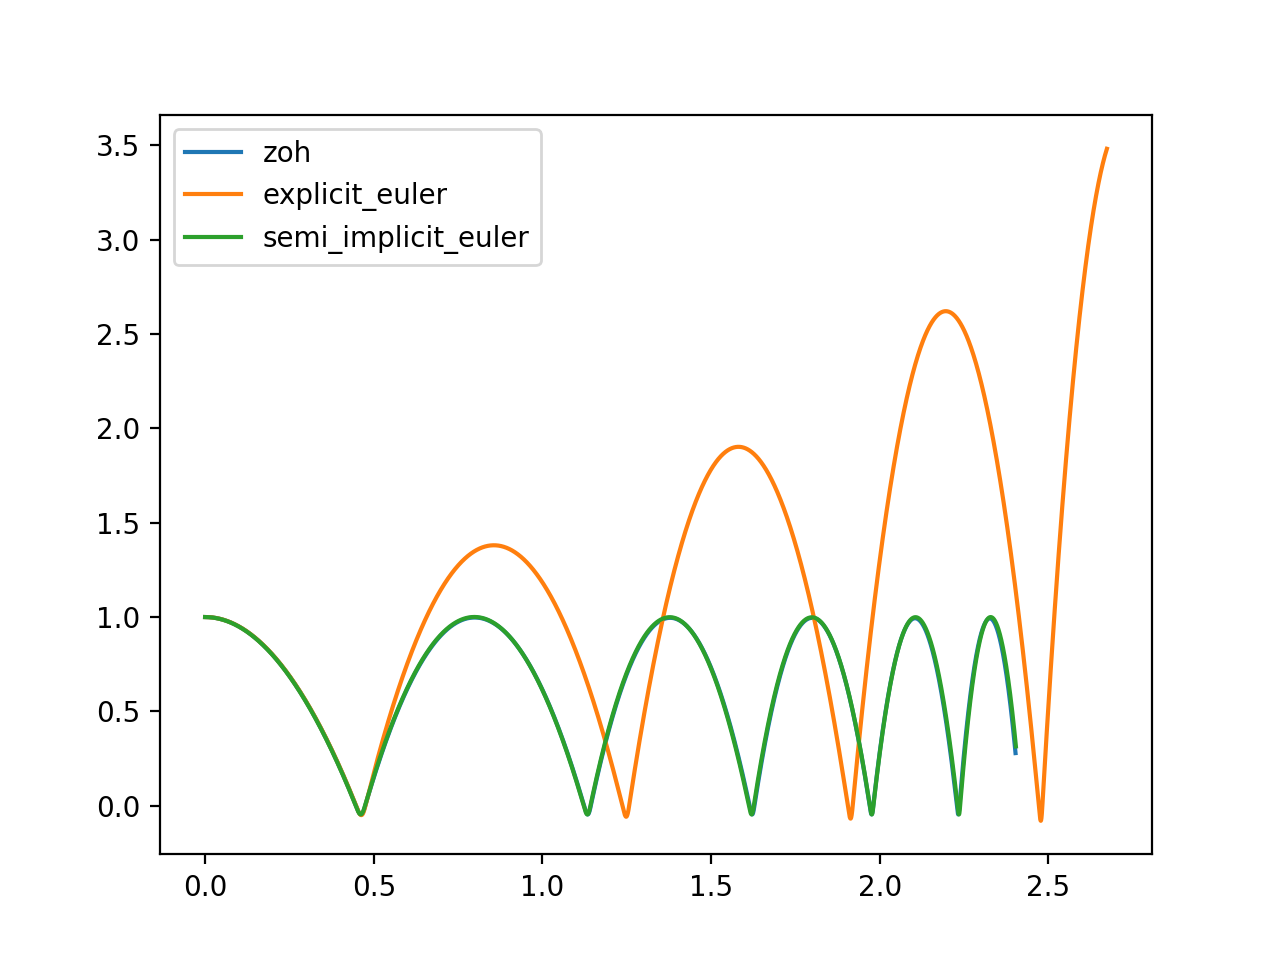

zoh
explicit_euler
semi_implicit_euler


In [6]:
x0 = np.array([[0.],[1.],[1.],[0.]])
N = 5000
h = 0.001
#time = [t*h for t in range(N+1)]
fig = plt.figure()
for method in ['zoh', 'explicit_euler', 'semi_implicit_euler']:
    print method
    S_0 = DTAffineSystem.from_continuous(A_0, B_0, c_0, h, method)
    S_1 = DTAffineSystem.from_continuous(A_1, B_1, c_1, h, method)
    S = DTPWASystem.from_orthogonal_domains([S_0, S_1], X, U)
    x_list, _ = S.simulate(x0, [np.zeros((1,1))]*N)
    q_x_list = [x[0,0] for x in x_list]
    q_y_list = [x[1,0] for x in x_list]
    plt.plot(q_x_list, q_y_list, label=method)
plt.legend()
plt.show()